# Covid-19 Monitoring Notebook
The Johns Hopkins Center for Systems Science and Engineering (CSSE) operates a [dashboard](https://systems.jhu.edu/research/public-health/ncov/) on the Web to follow the covid-19 cases and deaths all over the world. The data is collected on a daily basis from different sources and has been made available on [Github](https://github.com/CSSEGISandData/COVID-19). This is a selection for some European countries. The observed cases are shown for each country and then merged together for comparison. 

### Definitions
We follow the definitions for measures as given in the book by [Bonita et al., Basic Epidemiology, 2nd ed.](https://apps.who.int/iris/handle/10665/43541) available in different languages from the World Health Organization website.  
Prevalence of a disease: ratio of the number of people with the disease to the number of people observed at a certain point in time.  
Case fatality: proportion of cases with a specified disease or condition who die within a specified time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Harvest data from Johns Hopkins CSSE repository

In [3]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
confirmed = pd.read_csv(url_confirmed) 
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
deaths = pd.read_csv(url_deaths)

## Italy

### Confirmed infections

In [4]:
confirmed_infections_italy = confirmed[confirmed['Country/Region'] == 'Italy'].T[4:]
confirmed_infections_italy.T # show the data in a row

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
16,0,0,0,0,0,0,0,0,0,2,...,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462


### Cumulative deaths

In [5]:
cumulative_deaths_italy = deaths[deaths['Country/Region'] == 'Italy'].T[4:]
cumulative_deaths_italy.T # show the data in a row

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
16,0,0,0,0,0,0,0,0,0,0,...,52,79,107,148,197,233,366,463,631,827


### Deaths per day

In [6]:
days = cumulative_deaths_italy.index
days.size

50

The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [7]:
deaths_per_day_italy = [cumulative_deaths_italy.values[i + 1][0] - cumulative_deaths_italy.values[i][0] for i in range(0,days.size - 1)]

In [8]:
# resize the default plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

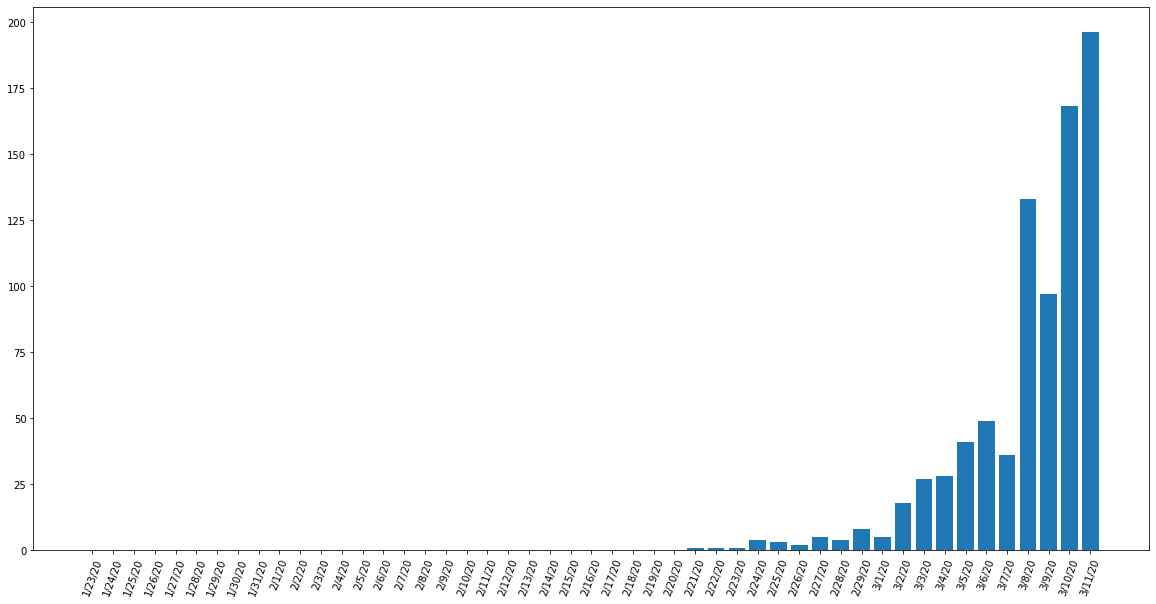

In [10]:
plot_deaths_per_day_italy = plt.bar(days[1:days.size], deaths_per_day_italy[:days.size - 1])
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_italy)

### Case fatality

In [11]:
infections_italy = confirmed_infections_italy.values[days.size - 1]
deaths_italy = cumulative_deaths_italy.values[days.size - 1];
case_fatality_italy = (deaths_italy / infections_italy) * 100 
print("Italy's case fatality = %.1f"%case_fatality_italy)  

Italy's case fatality = 6.6


## Germany

### Confirmed infections

In [12]:
confirmed_infections_germany = confirmed[confirmed['Country/Region'] == 'Germany'].T[4:]
confirmed_infections_germany.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
11,0,0,0,0,0,1,4,4,4,5,...,159,196,262,482,670,799,1040,1176,1457,1908


### Cumulative deaths

In [13]:
cumulative_deaths_germany = deaths[deaths['Country/Region'] == 'Germany'].T[4:]
cumulative_deaths_germany.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3


### Deaths per day

The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [14]:
deaths_per_day_germany = [cumulative_deaths_germany.values[i + 1][0] - cumulative_deaths_germany.values[i][0] for i in range(0,days.size - 1)]

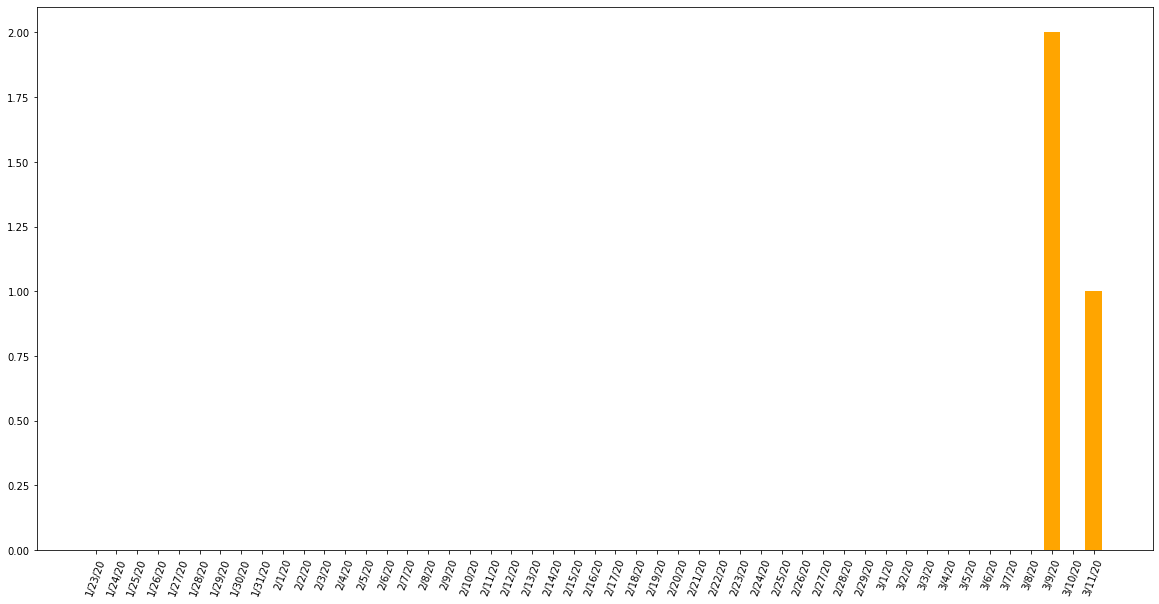

In [15]:
plot_deaths_per_day_germany = plt.bar(days[1:days.size], deaths_per_day_germany[:days.size - 1], color='orange')
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_germany)

### Case fatality

In [16]:
infections_germany = confirmed_infections_germany.values[days.size - 1]
deaths_germany = cumulative_deaths_germany.values[days.size - 1];
case_fatality_germany = (deaths_germany / infections_germany) * 100 
print("Germany's case fatality = %.1f"%case_fatality_germany)  

Germany's case fatality = 0.2


## France

### Confirmed infections

In [18]:
confirmed_infections_france = confirmed[confirmed['Province/State'] == 'France'].T[4:]
confirmed_infections_france.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
159,0,0,2,3,3,3,4,5,5,5,...,191,204,285,377,653,949,1126,1209,1784,2281


### Cumulative deaths

In [19]:
cumulative_deaths_france = deaths[deaths['Province/State'] == 'France'].T[4:]
cumulative_deaths_france.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
159,0,0,0,0,0,0,0,0,0,0,...,3,4,4,6,9,11,19,19,33,48


### Deaths per day

The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [20]:
deaths_per_day_france = [cumulative_deaths_france.values[i + 1][0] - cumulative_deaths_france.values[i][0] for i in range(0,days.size - 1)]

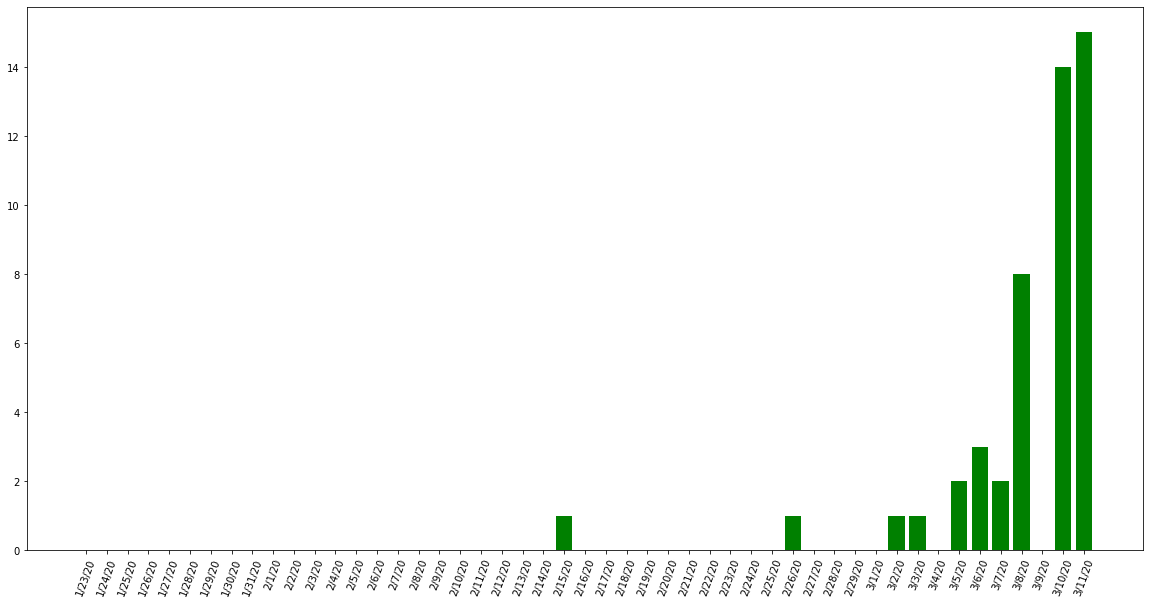

In [21]:
plot_deaths_per_day_france = plt.bar(days[1:days.size], deaths_per_day_france[:days.size - 1], color='green')
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_france)

### Case fatality

In [22]:
infections_france = confirmed_infections_france.values[days.size - 1]
deaths_france = cumulative_deaths_france.values[days.size - 1];
case_fatality_france = (deaths_france / infections_france) * 100 
print("France's case fatality = %.1f"%case_fatality_france)  

France's case fatality = 2.1


## Merged graphs for Italy, Germany and France

### Confirmed infections

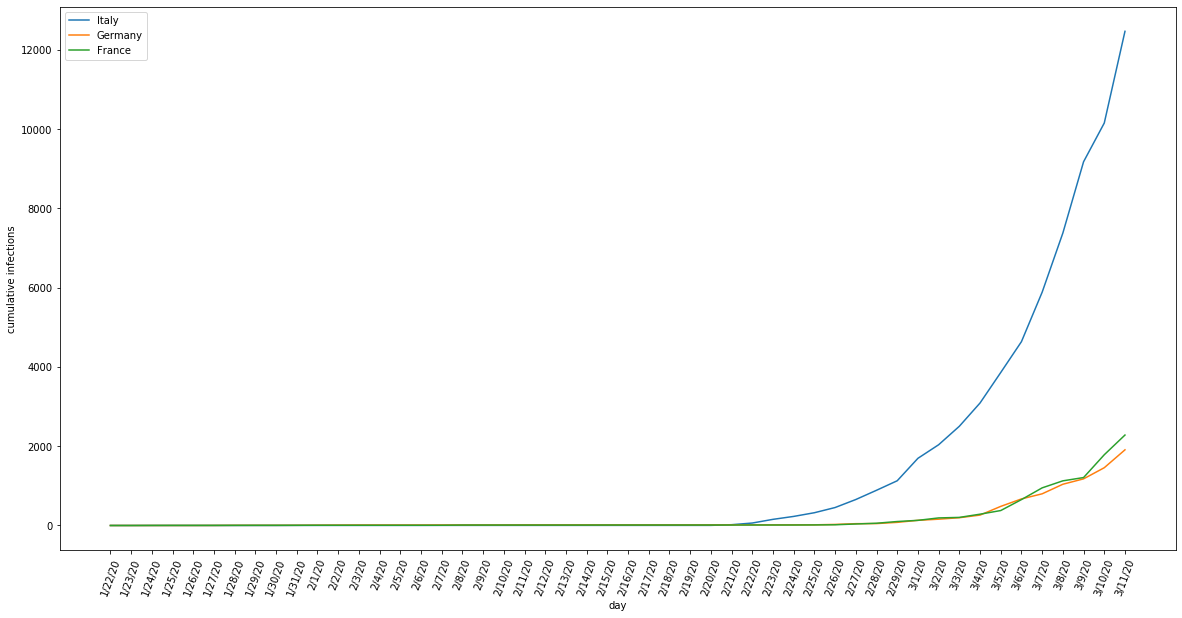

In [23]:
# add labels
plt.xlabel("day")
plt.ylabel("cumulative infections");
plt.xticks(rotation=70)
# plot the data
pi_italy = plt.plot(confirmed_infections_italy, label='Italy')
pi_germany = plt.plot(confirmed_infections_germany, label='Germany')
pi_france = plt.plot(confirmed_infections_france, label='France')
# add legend
plt.legend((pi_italy[0], pi_germany[0], pi_france[0]),['Italy','Germany', 'France'])

### Cumulative deaths

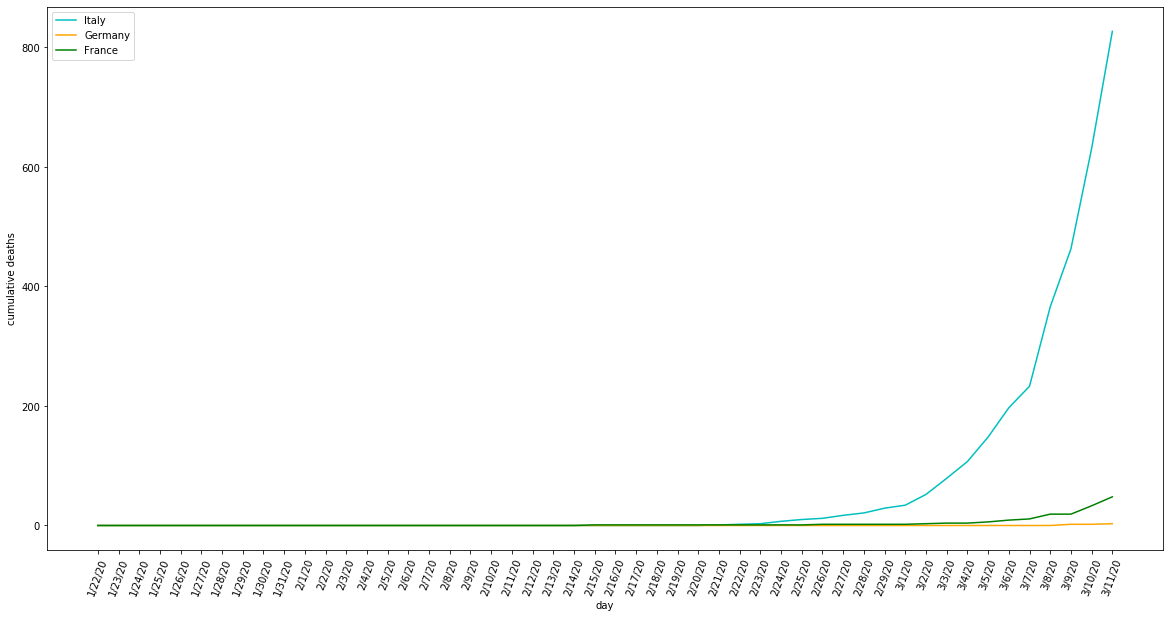

In [24]:
# add labels
plt.xlabel("day")
plt.ylabel("cumulative deaths");
plt.xticks(rotation=70)
# plot the data
pd_italy = plt.plot(cumulative_deaths_italy, label='Italy', color='c')
pd_germany = plt.plot(cumulative_deaths_germany, label='Germany', color='orange')
pd_france = plt.plot(cumulative_deaths_france, label='France', color='green')
# add legend
plt.legend((pd_italy[0], pd_germany[0], pd_france[0]),['Italy','Germany', 'France'])

### Deaths per day

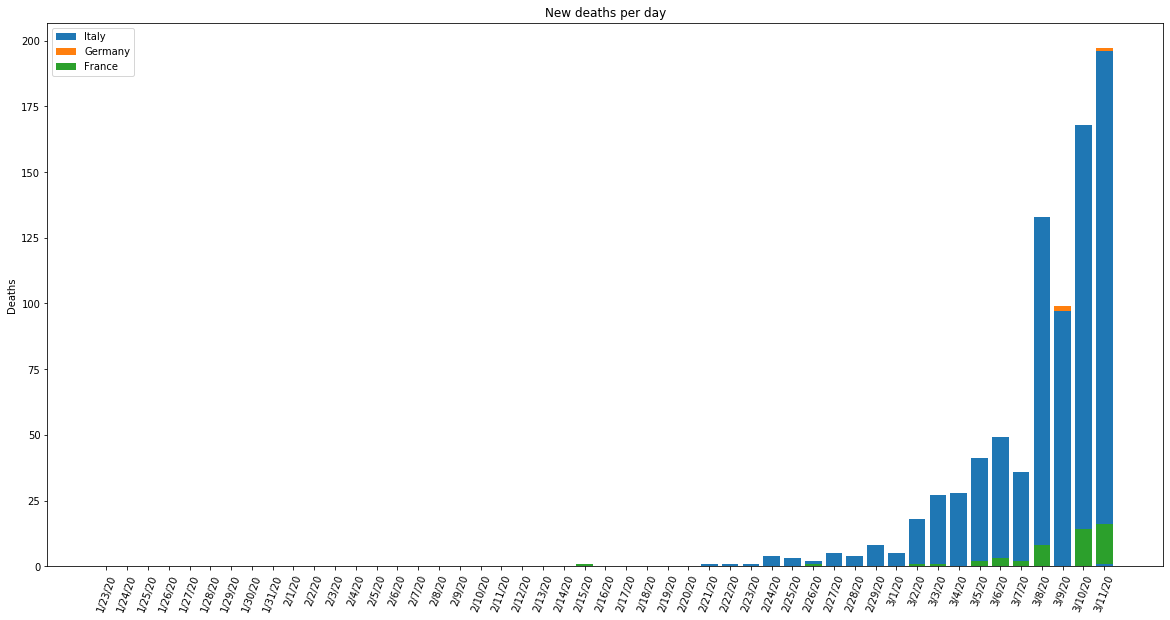

In [25]:
fig, ax = plt.subplots()
plt.ylabel('Deaths')
plt.title('New deaths per day')
pi = plt.bar(days[1:days.size], deaths_per_day_italy[:days.size])
pg = plt.bar(days[1:days.size], deaths_per_day_germany[:days.size], bottom = deaths_per_day_italy[:days.size])
pf = plt.bar(days[1:days.size], deaths_per_day_france[:days.size], bottom = deaths_per_day_germany[:days.size])
plt.xticks(rotation=70)
plt.legend((pi[0], pg[0], pf[0]), ('Italy', 'Germany', 'France'))
plt.show()